__семантический сегментатор изображений__

Евгений Борисов <esborisov@sevsu.ru>

Fully Convolutional Networks for Semantic Segmentation  
Jonathan Long, Evan Shelhamer, Trevor Darrell  
UC Berkeley  
8 Mar 2015  

https://arxiv.org/pdf/1411.4038.pdf

In [1]:
import os
import numpy as np
from numpy import random as rng
from PIL import Image

In [2]:
import torch
import torchvision

## подгружаем модель

https://towardsdatascience.com/review-fcn-semantic-segmentation-eb8c9b50d2d1

![FCN](https://miro.medium.com/max/508/1*NXNGhfSyzQcKzoOSt-Z0Ng.png)

In [3]:
# подгружаем предобученную модель FCN

# from torchvision.models.segmentation import fcn_resnet50
# model = fcn_resnet50(pretrained=True)

from torchvision.models.segmentation import fcn_resnet101
model = fcn_resnet101(pretrained=True)

model = model.train(False)

In [4]:
# имена классов

class_name = ['background','aeroplane','bicycle','bird','boat',
           'bottle','bus','car','cat','chair','cow','diningtable',
           'dog','horse','motorbike','person','potted plant',
           'sheep','sofa','train','tv/monitor']
n_classes = 21

## тестируем

In [5]:
img_folder = '../data/pascal/'
files = os.listdir(img_folder)

In [6]:
import torchvision.transforms as transforms

# преобразование фотографии в torch.tensor
img_transforms = transforms.Compose([ 
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
        ])

# img_transforms(img).unsqueeze(0).shape

---

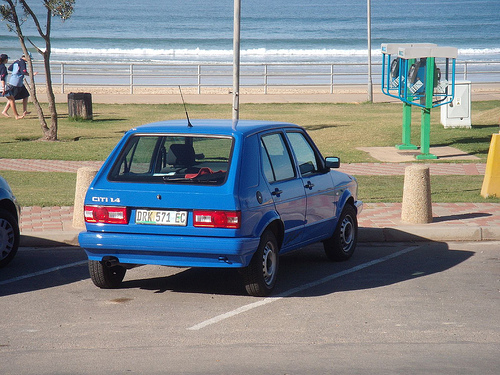

In [19]:
# выбираем случайное фото
f = rng.choice(files)
img = Image.open(os.path.join(img_folder,f))
img

In [20]:
x = img_transforms(img).unsqueeze(dim=0) # преобразуем фото в torch.tensor

with torch.no_grad(): # отключаем расчёт градиента
    o = model(x) # считаем выход модели

In [21]:
# извлекаем результаты
mask = torch.squeeze(o['out'],dim=0).detach().numpy()
mask_max_idx = np.argmax(mask,axis=0)

im_mask = [ (mask_max_idx==c).astype(np.uint8) for c in range(n_classes) ]

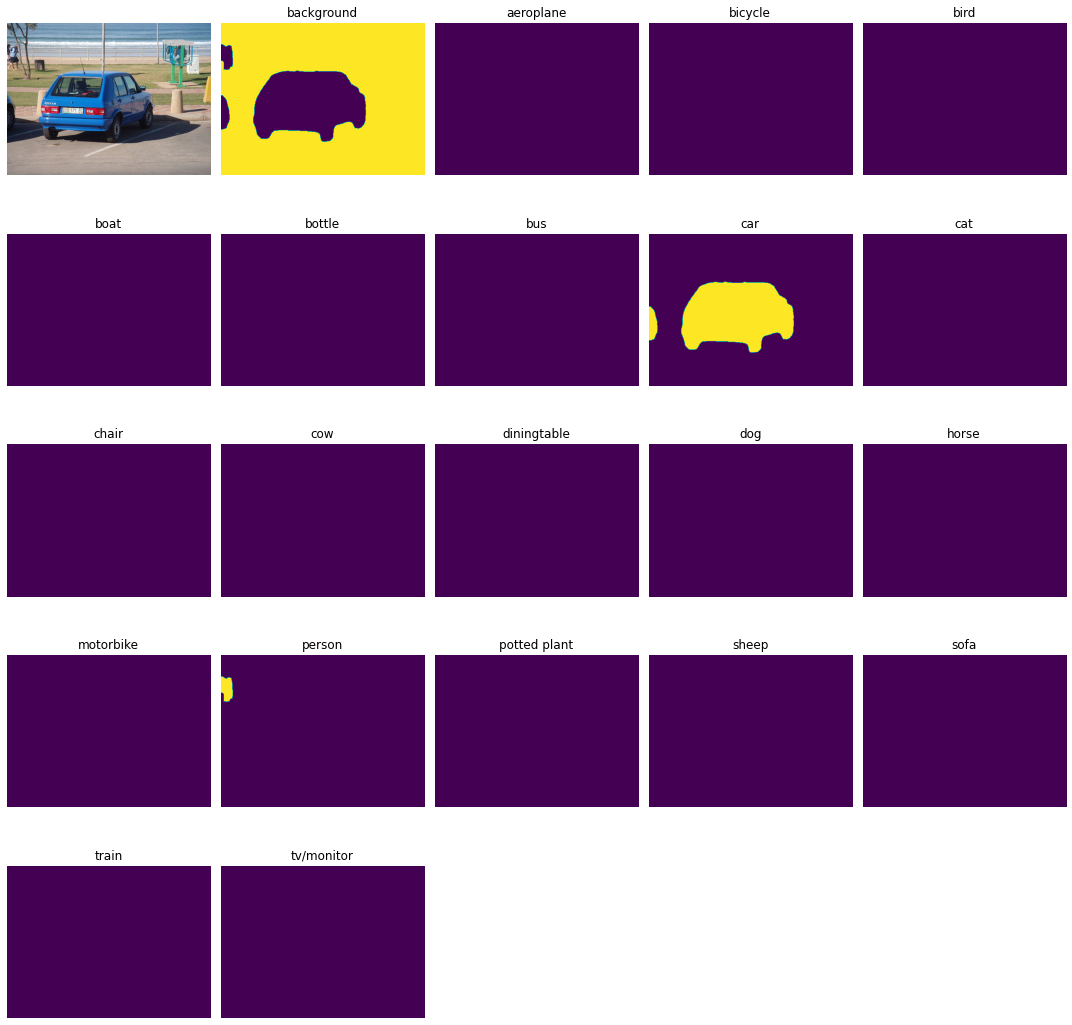

In [22]:
# рисуем результат

import matplotlib.pyplot as plt

col = 5
fig = plt.figure(figsize=(15,15))
plt.subplot(n_classes//col+1,col,1)
plt.axis(False)
plt.imshow(img)
for i,n in enumerate(range(n_classes),1):
    plt.subplot(n_classes//col+1,col,i+1)
    plt.title(class_name[n])
    plt.axis(False)
    plt.imshow(im_mask[n])
fig.tight_layout()    

---

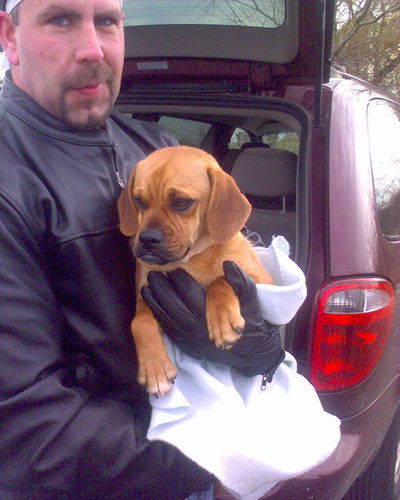

In [11]:
# выбираем случайное фото
f = rng.choice(files)
img = Image.open(os.path.join(img_folder,f))
img

In [12]:
x = img_transforms(img).unsqueeze(dim=0) # преобразуем фото в torch.tensor

with torch.no_grad(): # отключаем расчёт градиента
    o = model(x) # считаем выход модели

In [13]:
# извлекаем результаты
mask = torch.squeeze(o['out'],dim=0).detach().numpy()
mask_max_idx = np.argmax(mask,axis=0)

im_mask = [ (mask_max_idx==c).astype(np.uint8) for c in range(n_classes) ]

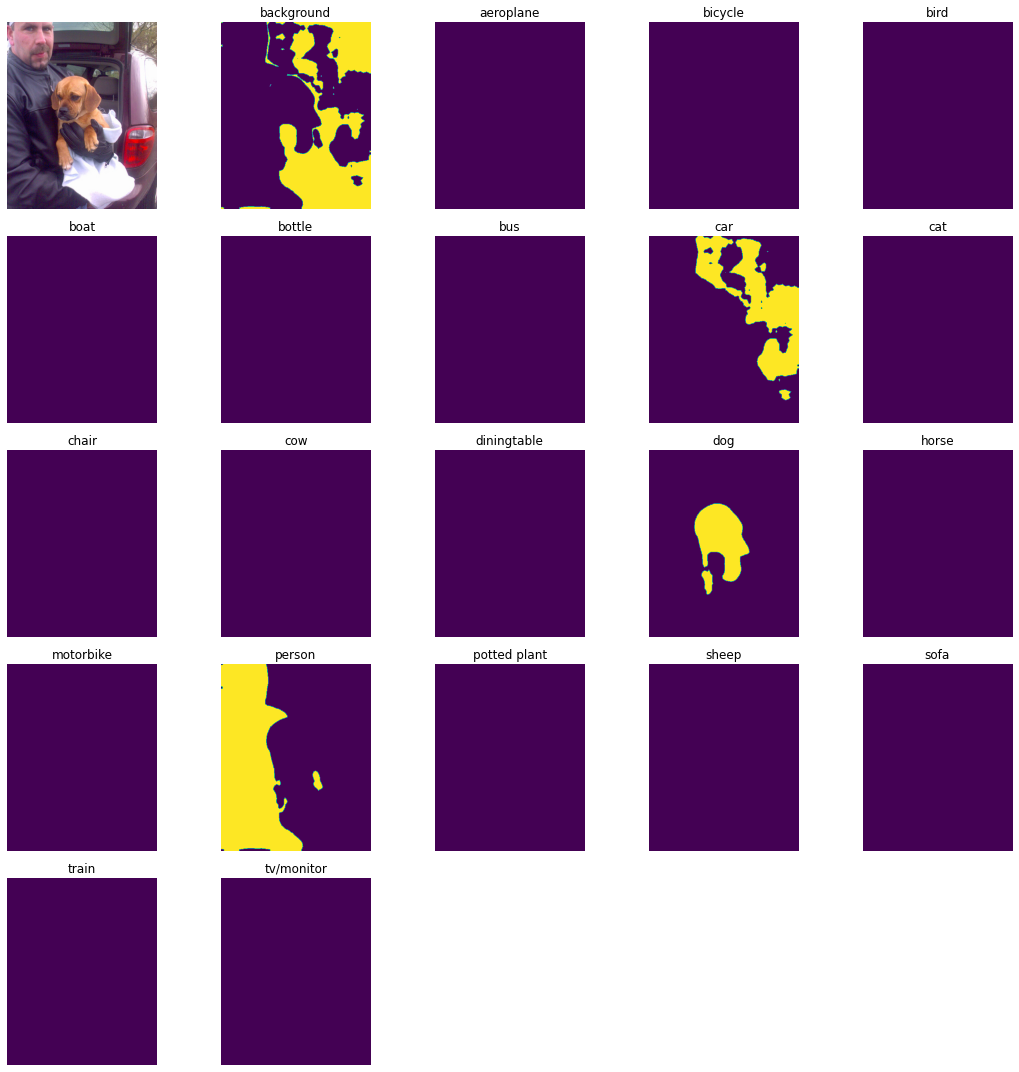

In [14]:
# рисуем результат

import matplotlib.pyplot as plt

col = 5
fig = plt.figure(figsize=(15,15))
plt.subplot(n_classes//col+1,col,1)
plt.axis(False)
plt.imshow(img)
for i,n in enumerate(range(n_classes),1):
    plt.subplot(n_classes//col+1,col,i+1)
    plt.title(class_name[n])
    plt.axis(False)
    plt.imshow(im_mask[n])
fig.tight_layout()    

---

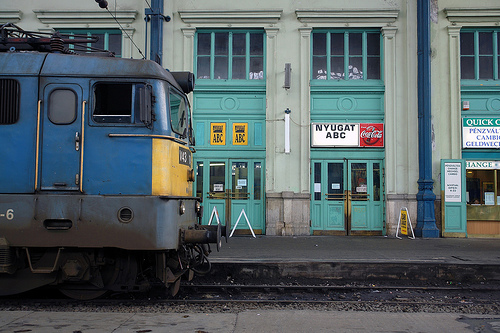

In [15]:
# выбираем случайное фото
f = rng.choice(files)
img = Image.open(os.path.join(img_folder,f))
img

In [16]:
x = img_transforms(img).unsqueeze(dim=0) # преобразуем фото в torch.tensor

with torch.no_grad(): # отключаем расчёт градиента
    o = model(x) # считаем выход модели

In [17]:
# извлекаем результаты
mask = torch.squeeze(o['out'],dim=0).detach().numpy()
mask_max_idx = np.argmax(mask,axis=0)

im_mask = [ (mask_max_idx==c).astype(np.uint8) for c in range(n_classes) ]

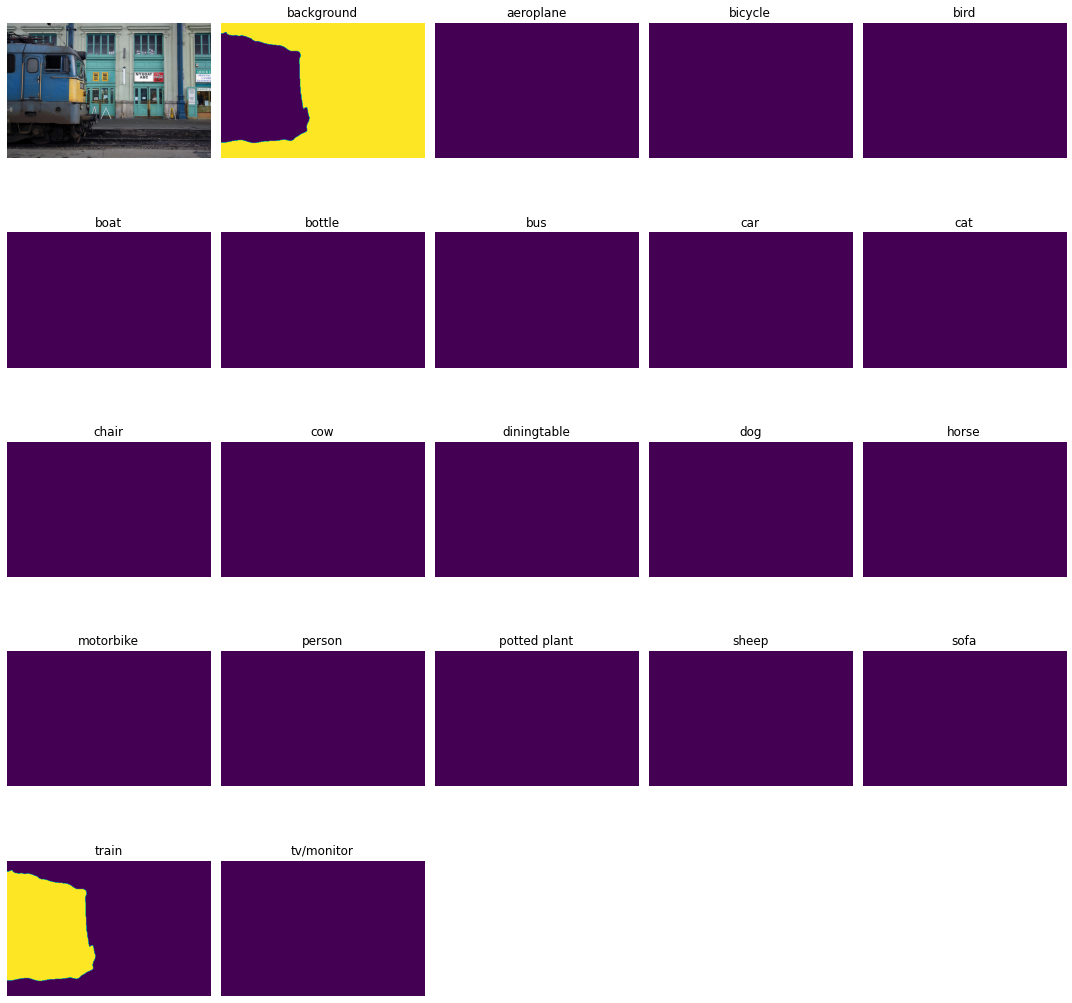

In [18]:
# рисуем результат

import matplotlib.pyplot as plt

col = 5
fig = plt.figure(figsize=(15,15))
plt.subplot(n_classes//col+1,col,1)
plt.axis(False)
plt.imshow(img)
for i,n in enumerate(range(n_classes),1):
    plt.subplot(n_classes//col+1,col,i+1)
    plt.title(class_name[n])
    plt.axis(False)
    plt.imshow(im_mask[n])
fig.tight_layout()    